### IMDB-RNN
- MaxLen: 128
- Words: 10000, Embeddding: 128
- Batch_size: 64, Epochs: 10
- Optimizer: RMSprop --> Adam, Lr: 1e-3
- Loss: binary crossentropy
- RNN: 2 layer GRU(64, 128)
- Evalution: AUC

In [1]:
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Embedding, Dense, GRU
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

In [2]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
train_values = sum([ i==1 for i in y_train])
test_values = sum([ i==1 for i in y_test])

print(f"positive: in train: {train_values/y_train.size * 100}%\npositive: in test: {test_values/y_test.size * 100}%\n")


positive: in train: 50.0%
positive: in test: 50.0%



In [4]:
class config:
    MAXLEN = 128
    EMBEDDING_DIM = 128
    BATCH_SIZE = 64
    EPOCHS = 3

In [5]:
x_train = pad_sequences(x_train, maxlen=config.MAXLEN)
x_test = pad_sequences(x_test, maxlen=config.MAXLEN)

In [6]:
imdb_input = Input((config.MAXLEN, ), name="input")
e = Embedding(12000, config.EMBEDDING_DIM, name="embeddding")(imdb_input)
gru1 = GRU(64, dropout=0.3, recurrent_dropout=0.2, name="gru1", return_sequences=True)(e)
gru2 = GRU(128, dropout=0.2, recurrent_dropout=0.2, name="gru2", return_sequences=False)(gru1)
output = Dense(1, activation="sigmoid")(gru2)
model = Model(inputs=[imdb_input], outputs=output)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 128)]             0         
_________________________________________________________________
embeddding (Embedding)       (None, 128, 128)          1536000   
_________________________________________________________________
gru1 (GRU)                   (None, 128, 64)           37248     
_________________________________________________________________
gru2 (GRU)                   (None, 128)               74496     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,647,873
Trainable params: 1,647,873
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=1e-3), metrics=["accuracy"])

In [9]:
%%time

history = model.fit(x_train, y_train, epochs=config.EPOCHS, batch_size=config.BATCH_SIZE, validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 164s 7ms/sample - loss: 0.4925 - accuracy: 0.7597 - val_loss: 0.3750 - val_accuracy: 0.8366
Epoch 2/3
25000/25000 [==============================] - 159s 6ms/sample - loss: 0.3214 - accuracy: 0.8671 - val_loss: 0.3394 - val_accuracy: 0.8562
Epoch 3/3
25000/25000 [==============================] - 156s 6ms/sample - loss: 0.2420 - accuracy: 0.9059 - val_loss: 0.3387 - val_accuracy: 0.8558
CPU times: user 25min 12s, sys: 2min 26s, total: 27min 39s
Wall time: 7min 59s


Text(0, 0.5, 'Accuracy')

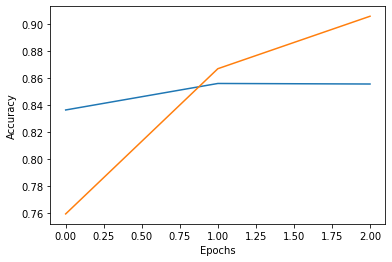

In [10]:
plt.plot(history.history["val_accuracy"])
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

In [12]:
loss, score = model.evaluate(x_test, y_test)
predict = model.predict(x_test)
print(f"loss: {loss: .4f}\naccuracy: {score * 100: .2f}%")

25000/25000 [==============================] - 36s 1ms/sample - loss: 0.3387 - accuracy: 0.8558
loss:  0.3387
accuracy:  85.58%


In [16]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, predict)
print(f"AUC score: {auc: .3f}")

AUC score:  0.933
